# Micro-Credit  Project

Submitted by     :Sindhu Shree N

Internship Batch :19

The main aim of this microcredit defaulter project is to build a predictive model which helps the organisation to select the customers and to improve their business

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [2]:
#importing the csv file and converting to the dataframe
df=pd.read_csv("Data file.csv")
df.shape

(209593, 37)

The dataset contains 2,09,593 rows and 36 features and one target feature.

In [3]:
pd.set_option("display.max_columns",37)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Observations:
    
    1.The dataset consists most of the features are continuous data only pcircle is object type and we have a date column.
    2.We can observe that the first column unnamed: 0 is just a index number so we can drop that column.
    3.Our target feature label has only two unique values either 0 or 1 so we have to use classification algorithms.
  

In [3]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [4]:
df.sample(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
44884,44885,1,59480I70374,131.0,79.650000,79.650000,255.00,255.00,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,2.666667,2.666667,UPW,2016-06-15
33100,33101,1,57139I89237,868.0,44.632000,44.632000,1438.80,1438.80,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-24
174321,174322,1,35190I90588,1317.0,4.075333,4.075333,201.82,201.82,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-02
41083,41084,1,87829I90453,481.0,545.887667,547.470000,3404.31,3521.70,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-01
154035,154036,1,05724I70370,109.0,16285.800000,16504.400000,6209.82,5534.42,1.0,0.0,...,6.0,0.0,5.0,30,6,0.0,4.250000,4.250000,UPW,2016-07-20


In [6]:
#features in the given dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

As we discussed above the feature "Unnamed: 0" is just a index number we are cross checking it.

In [8]:
df['Unnamed: 0']

0              1
1              2
2              3
3              4
4              5
           ...  
209588    209589
209589    209590
209590    209591
209591    209592
209592    209593
Name: Unnamed: 0, Length: 209593, dtype: int64

In [5]:
df['Unnamed: 0'].value_counts()

2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64

Thus our assumption is true and we are just dropping that feature.

In [12]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [8]:
df.shape

(209593, 36)

NOw we can see our features are reduced by one.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

So we can see that there are 21 float type features and 12 integer type and 3 are object type features in the dataset.

In [11]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [12]:
#summary statistics
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observations:
    
    1.We can see that mean is greater than median in the features ike'aon','daily_decr30','daily_decr90','rental30','rental90' which implicates that there will be a skewness.
    2.In most of the features we can see that there is a large difference between 75th percentile and the maximum value which means there will be a probability of having maximum number of outliers.

In [13]:
df['pcircle'].unique()
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

There is only one unique value in this pcircle feature which is UPW.

In [14]:
df['maxamnt_loans90'].unique()
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

There is 3 unique values in the maximum amount of loan.

In [15]:
#to check null values
df.isnull().sum().any()

False

Since we have got "False" as the result above, the dataset doesnot contains any null values which means our data is clean and no need to clean the data.

# Data Visualisation:

<AxesSubplot:>

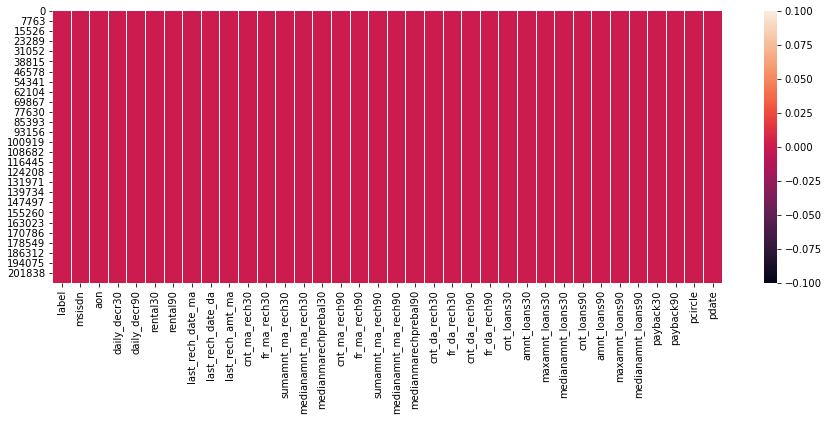

In [16]:
#checking null values using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='pcircle', ylabel='count'>

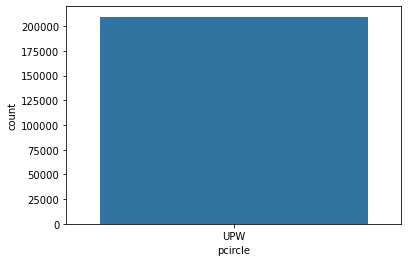

In [30]:
sns.countplot(df['pcircle'])

The above graph says there is a normal distribution of data which means no skewness has found in "pcircle" feature.

<AxesSubplot:xlabel='pdate', ylabel='count'>

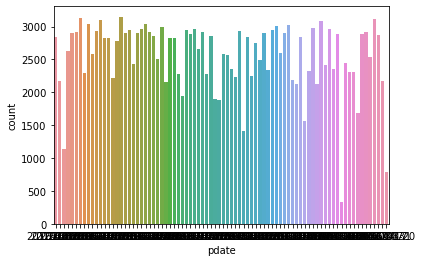

In [31]:
sns.countplot(df['pdate'])

The data distribution is not normal and has a skewness in "pdate" feature.

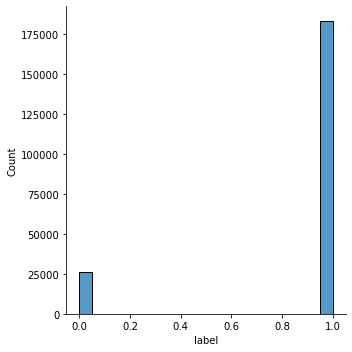

In [5]:
sns.displot(df['label'])

From above graph we can see that in the target column "label" success rate is high when compare to failure which means most of the customers who are borrowing loans are honestly paying back the loan amount only few are spam. Here the data is imbalance so we will balance it in further process. 

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

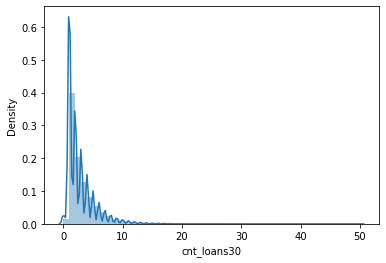

In [48]:
sns.distplot(df['cnt_loans30'])

Most of the customers took loans approximately 3-4 times and some took even 10 times within 30 days.

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

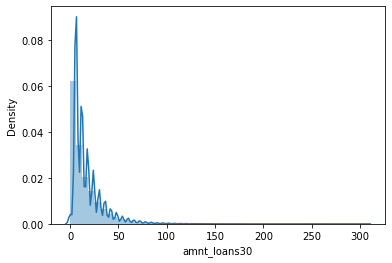

In [49]:
sns.distplot(df['amnt_loans30'])

Most of the customers took a lumpsum amount of 30Rs. in last 30 days.

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

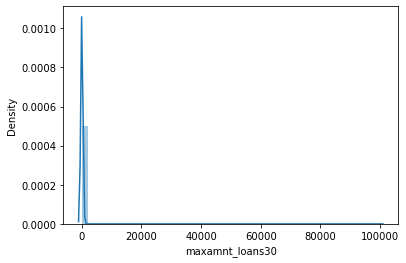

In [50]:
sns.distplot(df['maxamnt_loans30'])

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

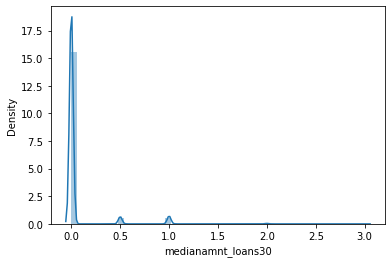

In [51]:
sns.distplot(df['medianamnt_loans30'])

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

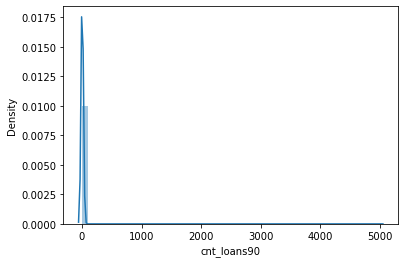

In [44]:
sns.distplot(df['cnt_loans90'])

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

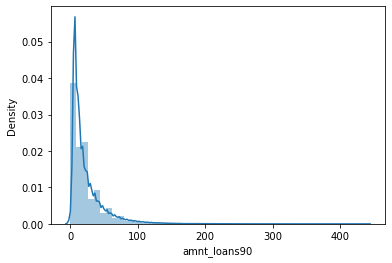

In [45]:
sns.distplot(df['amnt_loans90'])

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

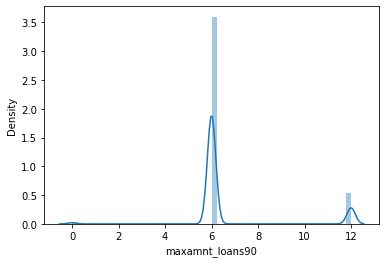

In [46]:
sns.distplot(df['maxamnt_loans90'])

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

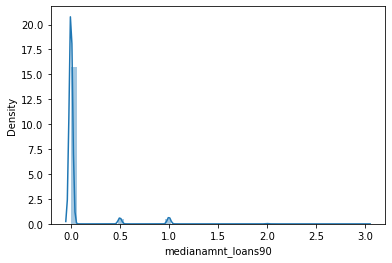

In [47]:
sns.distplot(df['medianamnt_loans90'])

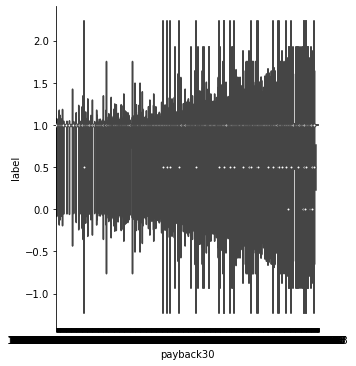

In [60]:
sns.catplot(x='payback30',y='label',data=df,kind='violin')

There is a lot of variation with payback30 feature.

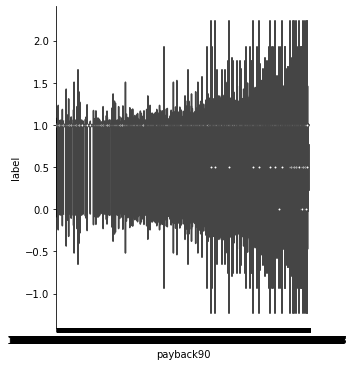

In [62]:
sns.catplot(x='payback90',y='label',data=df,kind='violin')

<AxesSubplot:xlabel='daily_decr30', ylabel='label'>

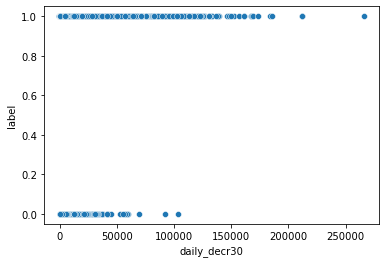

In [33]:
sns.scatterplot(x='daily_decr30',y='label',data=df)

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

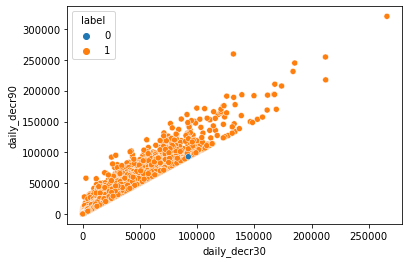

In [34]:
sns.scatterplot(x='daily_decr30',y='daily_decr90',hue='label',data=df)

We can observe that there are some outliers and the failure rate is very less.

Text(0.5, 1.0, 'Relation of rental30 and rental 90 with label')

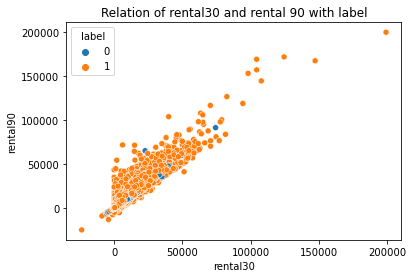

In [36]:
sns.scatterplot(x='rental30',y='rental90',hue='label',data=df)
plt.title("Relation of rental30 and rental 90 with label")

There are some outliers. Most of the customers are maintaining an average amount in main account which is contributing to the target feature label in a positive way.

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='last_rech_date_da'>

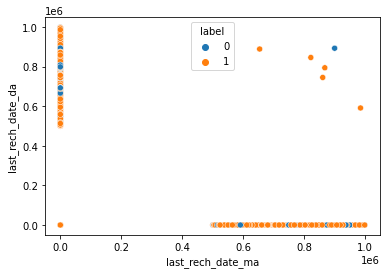

In [37]:
sns.scatterplot(x='last_rech_date_ma',y='last_rech_date_da',hue='label',data=df)

We can observe some of the outliers.

<AxesSubplot:xlabel='payback30', ylabel='payback90'>

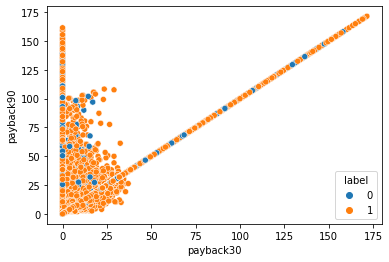

In [39]:
sns.scatterplot(x='payback30',y='payback90',hue='label',data=df)

We can see that payback30 is making a linear line with less rate of failures so it is highly contributing the target feature.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='fr_ma_rech90'>

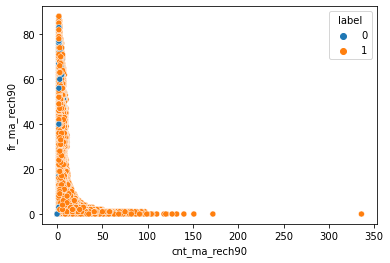

In [40]:
sns.scatterplot(x='cnt_ma_rech90', y='fr_ma_rech90',hue='label',data=df)

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='medianmarechprebal90'>

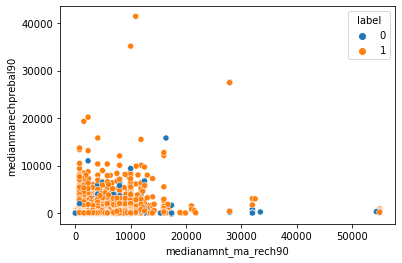

In [41]:
sns.scatterplot(x='medianamnt_ma_rech90', y='medianmarechprebal90',hue='label',data=df)

The median amount recharged in last 90, most of them is lying in the range of 0 to 20000. And we can see some outliers.

<AxesSubplot:xlabel='payback30'>

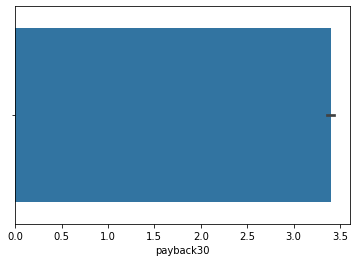

In [4]:
sns.barplot(df['payback30'])

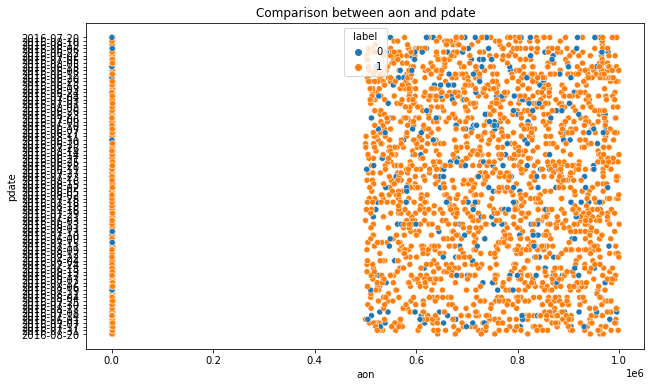

In [6]:
plt.figure(figsize=[10,6])
plt.title('Comparison between aon and pdate')
sns.scatterplot(df['aon'],df['pdate'],hue=df["label"]);

Above we can see there is equal share of success rate and failure rates where aon and pdate features are not that much contributing for the target feature label.

# Plotting Outliers:

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_date_ma          AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.656429,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.789286,0.642714;0.110714x0.107857)
medianamnt_ma_rech30       AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.257857,0.5132

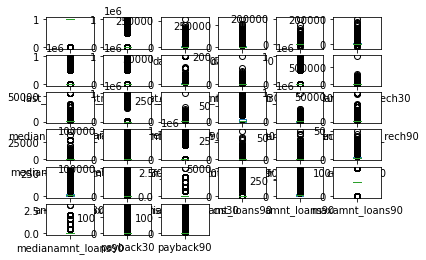

In [19]:
#plt.figure(figsize=(30,10))
df.plot(kind='box', subplots=True, layout=(6,6))

<AxesSubplot:xlabel='aon'>

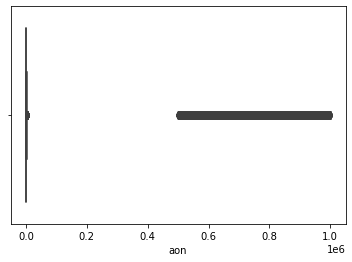

In [24]:
sns.boxplot(df['aon'])

<AxesSubplot:xlabel='daily_decr30'>

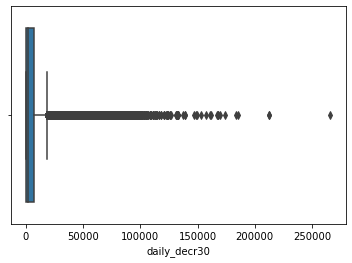

In [20]:
sns.boxplot(df['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90'>

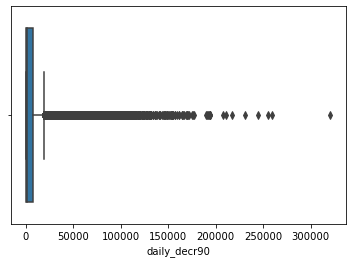

In [21]:
sns.boxplot(df['daily_decr90'])

<AxesSubplot:xlabel='rental30'>

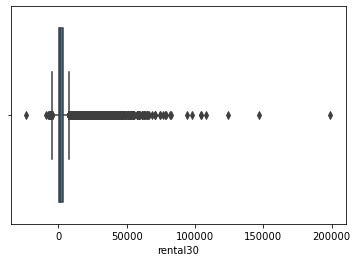

In [22]:
sns.boxplot(df['rental30'])

<AxesSubplot:xlabel='rental90'>

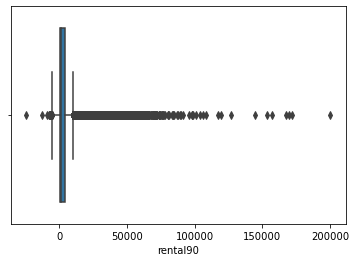

In [23]:
sns.boxplot(df['rental90'])

<AxesSubplot:xlabel='payback30'>

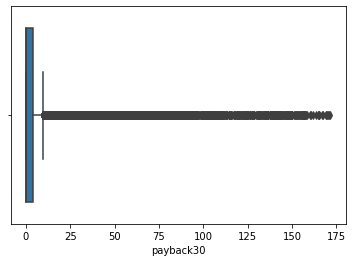

In [25]:
sns.boxplot(df['payback30'])

We can see in each and every graph plotted above we can find outliers except in 'payback30'.

# Correlation:

In [13]:
corr=df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


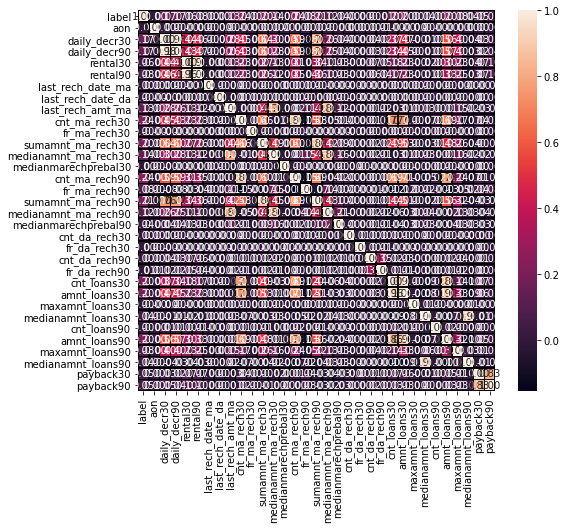

In [29]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.show()

<AxesSubplot:>

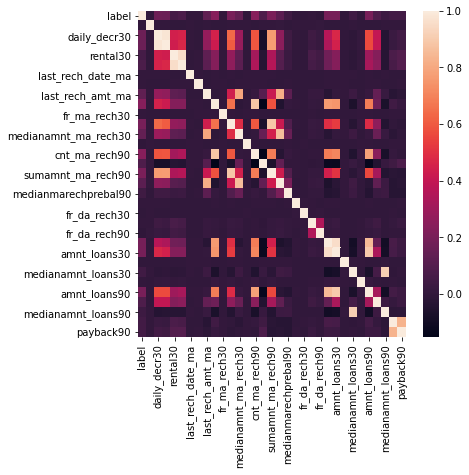

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(corr)

Obervations:
   
      1.The feature aon is having a negative correlation with the target feature.
      2.'payback30' and 'payback90' are having very positive correlation with the target feature label.

<AxesSubplot:xlabel='label', ylabel='aon'>

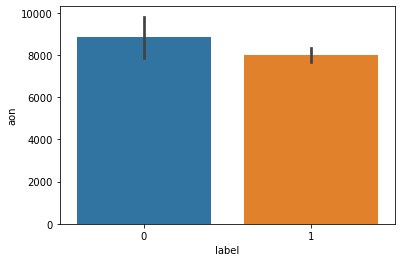

In [38]:
sns.barplot(df['label'],df['aon'])

# Encoding:

Using labelencoder to convert the object type data into integer type.

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['pdate']=le.fit_transform(df['pdate'])
df['pcircle']=le.fit_transform(df['pcircle'])
df['msisdn']=le.fit_transform(df['msisdn'])
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,40191,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,0,49
1,1,142291,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0,70


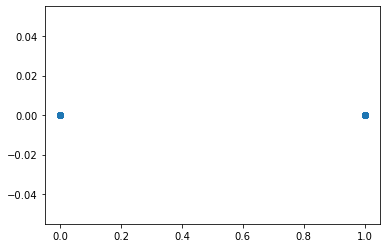

In [41]:
plt.scatter(df['label'],df['pcircle'])

Since "pcircle" and "aon" features are not not much contributing to the target feature we are dropping them from the dataset.

In [5]:
df.drop('pcircle',axis=1,inplace=True)
df.tail(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
209591,1,111388,1732.0,12488.228333,12574.37,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.0,10.5,54
209592,1,121263,1581.0,4489.362000,4534.82,483.92,631.20,13.0,0.0,7526,...,18,12.0,0.0,2.0,18,12,0.0,0.0,0.0,36


In [6]:
df.drop('aon',axis=1,inplace=True)
df.head(2)

,label,msisdn,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,49
1,1,142291,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,70


In [44]:
df.shape

(209593, 34)

In [45]:
pd.set_option("display.max_columns",34)
df.head()

,label,msisdn,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,49
1,1,142291,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,70
2,1,33594,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,79
3,1,104157,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,5
4,1,6910,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,21


In [53]:
df["last_rech_date_da"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
209588     0.0
209589     0.0
209590     0.0
209591    38.0
209592     0.0
Name: last_rech_date_da, Length: 209593, dtype: float64

In [7]:
df.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis=1,inplace=True)
df.shape

(209593, 27)

Since all these features are having most of their respective values as zero they are not much contributing to our target feature "label". Hence we are dropping those features.

# Removing Outliers:

In [8]:
from scipy.stats import zscore
z=np.abs(zscore(df[['rental30','rental90','daily_decr30','daily_decr90']]))
z

array([[0.57384426, 0.55858346, 0.25229941, 0.27634619],
       [0.23178841, 0.03602034, 0.73103667, 0.5533797 ],
       [0.41601952, 0.44767352, 0.43201111, 0.42903256],
       ...,
       [0.73556732, 0.93749981, 0.70079045, 0.53319431],
       [0.52935161, 0.4330386 , 0.77075515, 0.59455827],
       [0.51261987, 0.49427822, 0.09674426, 0.14174607]])

In [9]:
threshold=3
print(np.where(z>3))

(array([    36,     36,    107, ..., 209573, 209578, 209581], dtype=int64), array([2, 3, 1, ..., 1, 3, 3], dtype=int64))


In [10]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 27)
(199692, 27)


In [11]:
loss_percent=(209593-199692)/209593*100
loss_percent

4.723917306398592

Thus the loss percentage is just 4 we have not lost much data while removing outliers so that we can proceed further.

# Scaling:

In [12]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
scaled

array([[-2.64789583, -0.984213  , -0.25229941, ...,  2.9046997 ,
         2.39409346,  0.52239995],
       [ 0.37765836,  0.91502744,  0.73103667, ..., -0.38562959,
        -0.41923266,  1.47739785],
       [ 0.37765836, -1.10692885, -0.43201111, ..., -0.38562959,
        -0.41923266,  1.88668266],
       ...,
       [ 0.37765836, -0.7274342 ,  0.70079045, ...,  0.06820893,
        -0.04735622,  0.93168476],
       [ 0.37765836,  0.34017702,  0.77075515, ..., -0.38562959,
         0.59938541,  0.7497804 ],
       [ 0.37765836,  0.52386948, -0.09674426, ..., -0.38562959,
        -0.41923266, -0.06878922]])

# Resampling:

<AxesSubplot:xlabel='label', ylabel='count'>

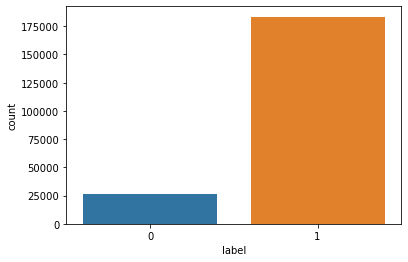

In [69]:
sns.countplot(df['label'])

As we discussed above the target feature data is imbalanced. The positive class is majority and the negative is minority, we will upsample the negative class. Because downsampling the positive class will lead to loss of data.

In [13]:
df_failure=df[df.label==0]
df_success=df[df.label==1]

In [14]:
#Upsampling the negative class
df_failure_upsampled=df_failure.sample(n=len(df_success),replace=True,random_state=42)
print(len(df_failure_upsampled))

183431


<AxesSubplot:xlabel='label', ylabel='count'>

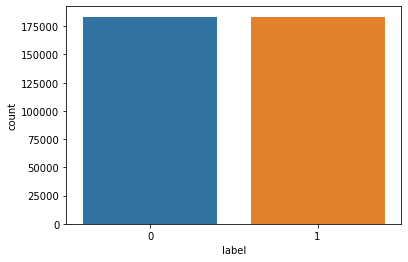

In [15]:
df_upsampled=df_success.append(df_failure_upsampled).reset_index(drop=True)
sns.countplot('label',data=df_upsampled)

Now we can see that the data is balanced.

In [16]:
x=df_upsampled.drop('label',axis=1)
y=df_upsampled['label']

# Checking and removing skewness:

In [75]:
df.skew()

label                   -2.270254
msisdn                   0.000719
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
pdate                    0.116409
dtype: float64

In [17]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[ 0.90412912,  1.38665148,  1.33270964, ..., -0.71154031,
        -0.77182058,  1.62288829],
       [-1.075175  ,  0.31944838,  0.30087795, ..., -0.71154031,
        -0.77182058,  1.94457221],
       [ 0.29210331, -0.7691789 , -0.76443629, ..., -0.71154031,
        -0.77182058, -1.60580351],
       ...,
       [-0.87734445,  0.19107142,  0.17922951, ..., -0.71154031,
        -0.77182058,  0.19261372],
       [ 0.5622671 , -1.14777757, -1.14072405, ..., -0.71154031,
        -0.77182058, -1.69834126],
       [-0.6326997 , -1.18874793, -1.18176619, ..., -0.71154031,
        -0.77182058, -1.69834126]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Spliiting the data:

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# Using Classification algorithms:

# 1.Logistic Regression:

In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Logistic Regression: \n\n",classification_report(y_test,pred_lr))
print("Test Accuracy Of Logistic regression is:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression: 

               precision    recall  f1-score   support

           0       0.70      0.82      0.76     55103
           1       0.78      0.66      0.71     54956

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.73    110059
weighted avg       0.74      0.74      0.73    110059

Test Accuracy Of Logistic regression is:73.56%


In [101]:
print("confusion matrix for Logistic Regression:","\n",confusion_matrix(y_test,pred_lr))

confusion matrix for Logistic Regression: 
 [[44934 10169]
 [18929 36027]]


# 2.Decision Tree Classifier:

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,pred_dt))
print("Test Accuracy Of Decision Tree Classifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96     55103
           1       1.00      0.92      0.96     54956

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059

Test Accuracy Of Decision Tree Classifier is:95.84%


In [21]:
print("confusion matrix for Decision Tree Classifier:","\n",confusion_matrix(y_test,pred_dt))

confusion matrix for Decision Tree Classifier: 
 [[54939   164]
 [ 4409 50547]]


# 3.Ridge Classifier:

In [99]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train,y_train)
pred_ridge = ridge.predict(x_test)
print(" Ridge Classifier: \n\n",classification_report(y_test,pred_ridge))
print("Test Accuracy:{}%".format(round(ridge.score(x_test,y_test)*100,2)))

 Ridge Classifier: 

               precision    recall  f1-score   support

           0       0.72      0.78      0.75     55103
           1       0.76      0.70      0.73     54956

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.74    110059
weighted avg       0.74      0.74      0.74    110059

Test Accuracy:73.93%


In [103]:
print("confusion matrix for Ridge Classifier:","\n",confusion_matrix(y_test,pred_ridge))

confusion matrix for Ridge Classifier: 
 [[43117 11986]
 [16709 38247]]


# 4.GaussianNB Classifier:

In [95]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print(" GaussianNB Classifier: \n\n",classification_report(y_test,pred_gb))
print("Test Accuracy:{}%".format(round(gb.score(x_test,y_test)*100,2)))

 GaussianNB Classifier: 

               precision    recall  f1-score   support

           0       0.63      0.91      0.75     55103
           1       0.84      0.47      0.60     54956

    accuracy                           0.69    110059
   macro avg       0.74      0.69      0.67    110059
weighted avg       0.74      0.69      0.67    110059

Test Accuracy:69.07%


In [105]:
print("confusion matrix for GaussianNB Classifier:","\n",confusion_matrix(y_test,pred_gb))

confusion matrix for GaussianNB Classifier: 
 [[50249  4854]
 [29186 25770]]


# 5.XGBoost Classifier:

In [97]:
import xgboost as xgb
xg=xgb.XGBClassifier()

In [98]:
xg.fit(x_train,y_train)
pred_xg=xg.predict(x_test)
print("XgBoost Classifier: \n\n",classification_report(y_test,pred_xg))
print("Test Accuracy:{}%".format(round(xg.score(x_test,y_test)*100,2)))

[23:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XgBoost Classifier: 

               precision    recall  f1-score   support

           0       0.87      0.91      0.89     55103
           1       0.90      0.86      0.88     54956

    accuracy                           0.89    110059
   macro avg       0.89      0.89      0.89    110059
weighted avg       0.89      0.89      0.89    110059

Test Accuracy:88.55%


In [106]:
print("confusion matrix for XGBoost Classifier:","\n",confusion_matrix(y_test,pred_xg))

confusion matrix for XGBoost Classifier: 
 [[50008  5095]
 [ 7507 47449]]


# Cross Validation Score:

In [23]:
from sklearn.model_selection import cross_val_score

In [109]:
print(cross_val_score(lr,x,y,cv=5).mean()*100)

73.56253870313562


In [24]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

96.18821296420782


In [111]:
print(cross_val_score(ridge,x,y,cv=5).mean()*100)

73.95614700803783


In [112]:
print(cross_val_score(gb,x,y,cv=5).mean()*100)

69.11917888451498


While comparing cross validation score with the accuracy_score, decision tree classifier is having more accuracy_score with improved cross validation score. So we are considering the decision tree classifier for the tuning process.

# Hyper Parameter Tuning:

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters={'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':[2,3,4],
            'min_samples_split':[3,5,7],
            'min_samples_leaf':[1,2],
            'max_features':['auto','sqrt','log2'],
            'random_state':[42]}
grid=GridSearchCV(estimator=dt, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 5, 7], 'random_state': [42],
                         'splitter': ['best', 'random']})

In [28]:
best_parameters=grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42, 'splitter': 'best'}


In [29]:
(grid.best_score_)*100

77.41342424773975

Testing with new parameters:

In [30]:
clf=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_split=3,min_samples_leaf=1,max_features='log2',random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2', min_samples_split=3,
                       random_state=42)

In [31]:
clf.score(x_test,y_test)*100

77.52478216229477

Thus Decisiontreeclassifier is giving train and test accuracy almost same and it is the best fit for the present dataset. 

# Further Evaluation: 

In [38]:
Final_mod = DecisionTreeClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.82314940168455


In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
predictions = cross_val_predict(clf, x_train, y_train, cv=5)
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7747532086770738
Recall: 0.7733722514107803


Our model predicts 77% of the time, a customer payed back the amount within 5 days of issuing loan correctly (precision). The recall tells us that it predicted the survival of 77 % of the people who actually payed the amount.

# f1-score:

In [43]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7740621141238933

There we have it, a 77.41 % F-score. The score is not that high, because we have a recall of 77.34%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because we sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

# Precision-Recall Curve:

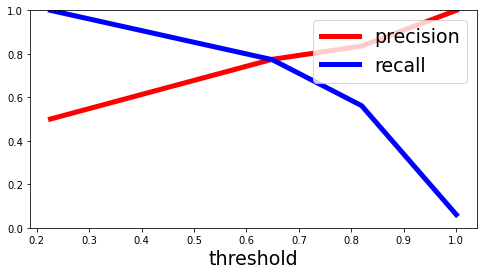

In [49]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y1_scores = clf.predict_proba(x_train)
y1_scores = y1_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y1_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above we can clearly see that the recall is falling of slightly at a precision of around 77%. Because of that we may want to select the precision/recall tradeoff before that — maybe at around 75 %. we are now able to choose a threshold, that gives the best precision/recall tradeoff for our current machine learning problem. we can see that we would need a threshold of around 0.6. Then we could train a model with exactly that threshold and would get the desired accuracy.

# AUC ROC curve:

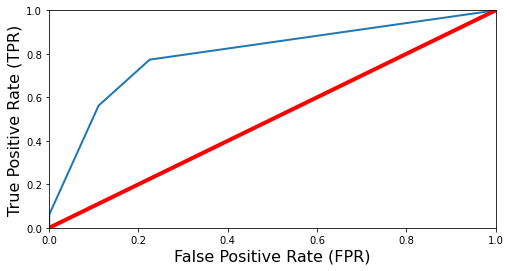

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y1_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 4))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely decision classifier and therefore our classifier should be as far away from it as possible. Our Decision Tree model seems to do a good job. Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# AUC ROC Score:

In [47]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y1_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7979492836505656


Thus we got a moderate score of approximately 80%.

# Evaluate the model:

In [50]:
Final_mod = DecisionTreeClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.77590201619131


# Saving the model:

In [51]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Conclusion:

In [52]:
preds = dt.predict(x_test)
dataframe=pd.DataFrame({})
dataframe['Predicted label']=preds
dataframe['Actual label']=y_test.values
print(dataframe)

        Predicted label  Actual label
0                     0             0
1                     0             0
2                     0             1
3                     1             1
4                     0             0
...                 ...           ...
110054                1             1
110055                1             1
110056                1             1
110057                1             1
110058                1             1

[110059 rows x 2 columns]


The test and train data are balanced and hit the accuracy of 95%. Thus the features like 'payback30','payback90','daily_decr30','daily_decr90','rental30','rental90' are contributing much while other features like 'aon','msisdn' and 'pdate' are not much preference giving features.